In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, precision_recall_curve, auc

file_paths = {
    "Decision Tree": "../40_results/decision_tree_prob.csv",
    "XGBoost": "../40_results/xgboost_prob.csv",
    "Logistic Regression": "../40_results/logistic_prob.csv",
    "Naive Bayes": "../40_results/naive_prob.csv",
    "MLP Classifier": "../40_results/mlp_prob.csv",
    "Generalized Additive Models": "../40_results/gam_prob.csv",
    "CatBoost": "../40_results/catboost_prob.csv",
}

dfs_pred = {
    model_name: pd.read_csv(file_path)["score"]
    for model_name, file_path in file_paths.items()
}
df_true = pd.read_csv("../40_results/y_test.csv")["score"]


random_guess_proba = np.random.rand(len(df_true))

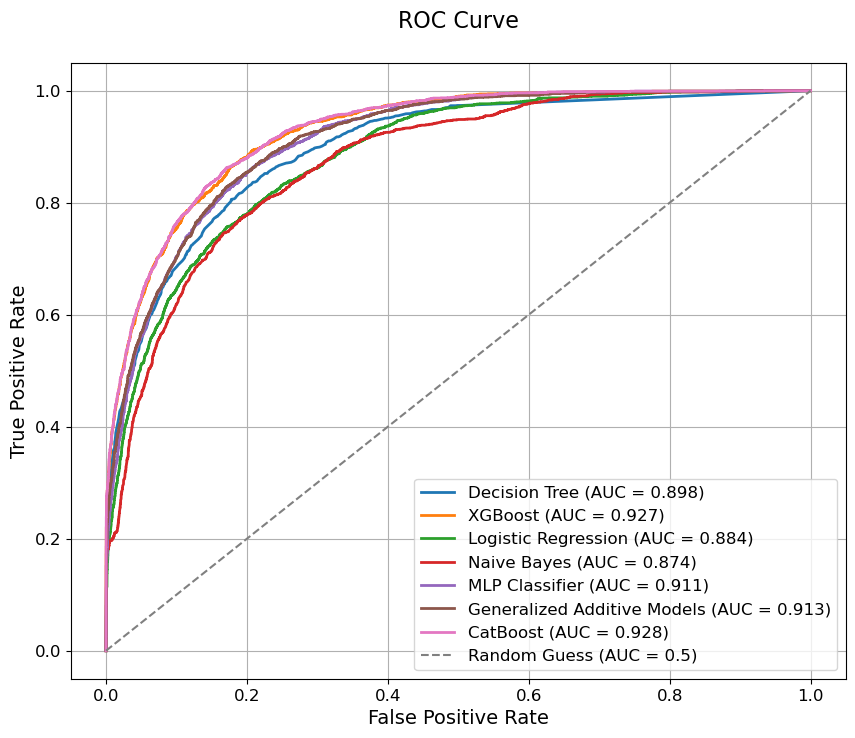

In [2]:
# AUC curve
fig_roc = plt.figure(figsize=(10, 8))
for model_name, y_pred_proba in dfs_pred.items():
    fpr, tpr, _ = roc_curve(df_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{model_name} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess (AUC = 0.5)")

plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve\n", fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [3]:
from sklearn.model_selection import train_test_split

path = "https://raw.githubusercontent.com/nogibjj/IDS705_FinalProject_Lemur_Team/main/01_clean_data/adult_ohe.csv"

adult_ohe = pd.read_csv(path)

X = adult_ohe.drop(columns=["income"])
y = adult_ohe["income"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

ap_random = sum(y == 1) / len(y)
ap_random

0.23928176569346055

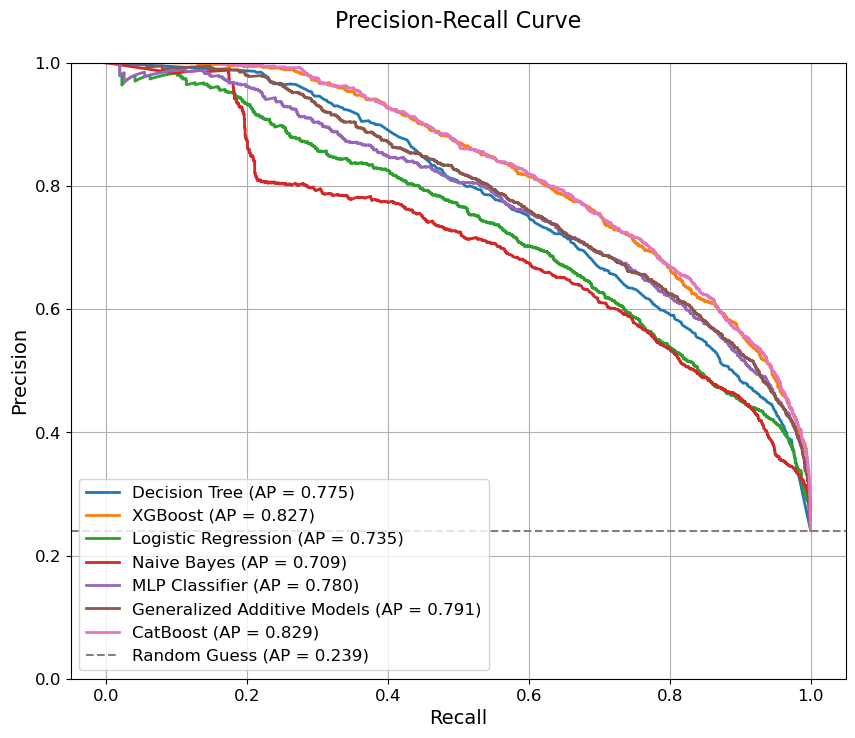

In [4]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    average_precision_score,
)

ap_random = sum(y == 1) / len(y)


# FIX GRAPH
# PR curve

fig_pr = plt.figure(figsize=(10, 8))
for model_name, y_pred_proba in dfs_pred.items():
    precision, recall, _ = precision_recall_curve(df_true, y_pred_proba)
    ap = average_precision_score(df_true, y_pred_proba)
    # pr_auc = auc(recall, precision)
    plt.plot(recall, precision, lw=2, label=f"{model_name} (AP = {ap:.3f})")

plt.axhline(
    y=ap_random,
    color="gray",
    linestyle="--",
    label=f"Random Guess (AP = {ap_random:.3f})",
)


plt.xlabel("Recall", fontsize=14)
plt.ylabel("Precision", fontsize=14)
plt.title("Precision-Recall Curve\n", fontsize=16)
plt.legend(loc="lower left", fontsize=12)
plt.grid(True)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1)
plt.show()

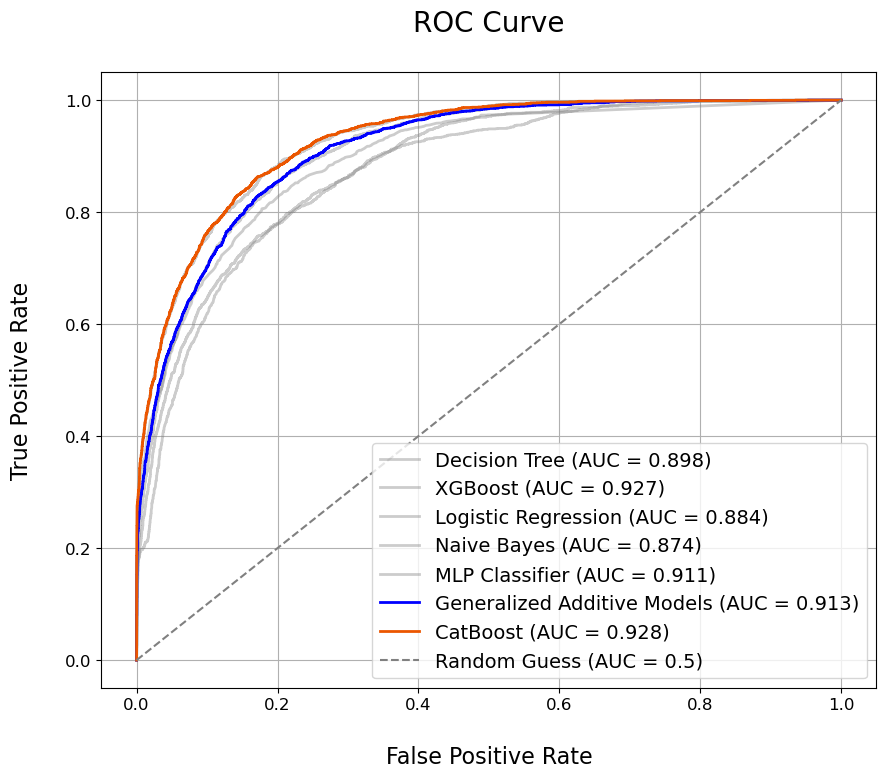

In [5]:
# Plot for slide

# AUC curve
fig_roc = plt.figure(figsize=(10, 8))
for model_name, y_pred_proba in dfs_pred.items():
    fpr, tpr, _ = roc_curve(df_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    if model_name == "CatBoost":
        plt.plot(
            fpr, tpr, lw=2, label=f"{model_name} (AUC = {roc_auc:.3f})", color="#eb5600"
        )
    elif model_name == "Generalized Additive Models":
        plt.plot(
            fpr,
            tpr,
            lw=2,
            label=f"{model_name} (AUC = {roc_auc:.3f})",
            color="blue",
        )

    else:
        plt.plot(
            fpr,
            tpr,
            lw=2,
            label=f"{model_name} (AUC = {roc_auc:.3f})",
            color="gray",
            alpha=0.4,
        )


plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess (AUC = 0.5)")

plt.xlabel("\nFalse Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate\n", fontsize=16)
plt.title("ROC Curve\n", fontsize=20)
plt.legend(loc="lower right", fontsize=14)
plt.grid(True)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()